# Importing Files

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD, Adam
import os
from tensorflow.keras.regularizers import l2


# Importing Dataset

In [2]:
train_set = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test_set = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [3]:
train_set.shape
x_train, x_test = np.array(train_set.drop("label", axis = 1)) / 255, np.array(test_set) / 255
y_train = np.array(train_set.label)

In [4]:
x_train.shape
X = x_train.reshape(x_train.shape[0], 28, 28,1)
X.shape

(42000, 28, 28, 1)

In [5]:
x_test.shape

(28000, 784)

In [6]:
#reshapes it
X_test = x_test.reshape(x_test.shape[0], 28, 28 ,1)

In [7]:
X_test.shape

(28000, 28, 28, 1)

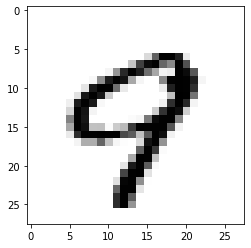

In [8]:
plt.imshow(X[100], cmap="Greys")

# Defining CNN Model

In [9]:
def create_model():
    with tf.name_scope("cnn"):
        model = Sequential()
        model.add(Conv2D(64, (1,1), activation="relu", input_shape=(28,28,1)))
        model.add(Conv2D(64, (3,3), activation="relu",))
        model.add(MaxPooling2D((2,2)))
        model.add(Conv2D(128,(1,1), activation="relu"))
        model.add(Conv2D(128,(3,3), activation="relu"))
        model.add(MaxPooling2D((2,2)))
        model.add(Conv2D(256, (1,1), activation="relu"))
        model.add(Conv2D(256, (3,3), activation="relu"))
        model.add(Dropout(0.5))
        model.add(Flatten())
        model.add(Dense(84, activation="relu"))
        model.add(Dense(42, activation='relu'))
        model.add(Dense(10, activation="softmax"))
        adam = Adam(learning_rate=1e-3)
        model.compile(optimizer=adam, loss="categorical_crossentropy", metrics= ['accuracy'])
    return model

In [10]:
model = create_model()
model.summary()

2022-09-03 07:44:46.483450: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 128)       8320      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 5, 256)         3

In [11]:
EPOCHS = 20
BATCH_SIZE = 128
#accidental error in the number of batches, but if it'll work , then whatever
y_one_hot_train = tf.one_hot(y_train, 10)
# encoding , without it the model got a 10% accuracy
history = model.fit(X,y_one_hot_train, epochs=EPOCHS, batch_size = BATCH_SIZE)

2022-09-03 07:44:47.163409: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
329/329 [==============================] - 136s 411ms/step - loss: 0.2552 - accuracy: 0.9177
Epoch 2/20
329/329 [==============================] - 134s 408ms/step - loss: 0.0633 - accuracy: 0.9807
Epoch 3/20
329/329 [==============================] - 135s 410ms/step - loss: 0.0465 - accuracy: 0.9859
Epoch 4/20
329/329 [==============================] - 136s 414ms/step - loss: 0.0363 - accuracy: 0.9884
Epoch 5/20
329/329 [==============================] - 137s 417ms/step - loss: 0.0308 - accuracy: 0.9904
Epoch 6/20
329/329 [==============================] - 135s 412ms/step - loss: 0.0274 - accuracy: 0.9911
Epoch 7/20
329/329 [==============================] - 137s 417ms/step - loss: 0.0240 - accuracy: 0.9923
Epoch 8/20
329/329 [==============================] - 139s 421ms/step - loss: 0.0206 - accuracy: 0.9933
Epoch 9/20
329/329 [==============================] - 137s 417ms/step - loss: 0.0193 - accuracy: 0.9937
Epoch 10/20
329/329 [==============================] - 137s 417m

In [12]:
print(sum(history.history["accuracy"]) / EPOCHS)

0.9893940478563309


<function matplotlib.pyplot.show(close=None, block=None)>

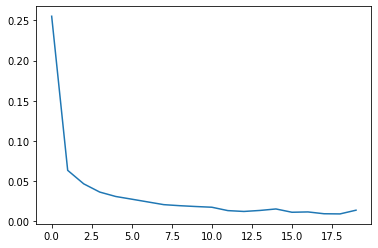

In [13]:
plt.plot(history.history["loss"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

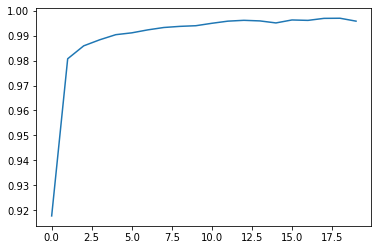

In [14]:
plt.plot(history.history["accuracy"])
plt.show

In [15]:
pred = model.predict(X_test)

In [16]:
new_pred = tf.math.argmax(pred, axis = -1)
sub = {'ImageId': test_set.index + 1, 'Label': new_pred}
basic_sub = pd.DataFrame(data=sub)
basic_sub.to_csv("submission.csv", index=False)
basic_sub.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
